In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
                                                                                                                                                                                                                                                     
df_train= pd.read_csv("D:\hackathon _Machine hack\Participants_Data_TGIH\Participants_Data_TGIH\Train.csv")

In [3]:
df_train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284780 entries, 0 to 284779
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    284780 non-null  int64  
 1   StockCode    284780 non-null  int64  
 2   Description  284780 non-null  int64  
 3   Quantity     284780 non-null  int64  
 4   InvoiceDate  284780 non-null  object 
 5   UnitPrice    284780 non-null  float64
 6   CustomerID   284780 non-null  float64
 7   Country      284780 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 17.4+ MB


In [5]:
df_train.shape

(284780, 8)

In [6]:
df_train.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [7]:
df_train.UnitPrice.value_counts()

1.25     32624
1.65     26160
2.95     19122
0.85     18379
0.42     15405
         ...  
5.70         1
3.56         1
5.14         1
1.02         1
65.91        1
Name: UnitPrice, Length: 524, dtype: int64

###  Convert the values in categorical columns to numerical values.

We use LabelEncoder to encode the categorical values in categorical columns into numerical values.

In [8]:
cat_feature = df_train.select_dtypes(include = "object").columns
print (cat_feature)

Index(['InvoiceDate'], dtype='object')


In [9]:
#Label Encoding 'for object' to numeric conversion
from sklearn.preprocessing import LabelEncoder
LE_var = LabelEncoder()

for col in cat_feature:
    df_train[col] = LE_var.fit_transform(df_train[col].astype(str))

print (df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284780 entries, 0 to 284779
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    284780 non-null  int64  
 1   StockCode    284780 non-null  int64  
 2   Description  284780 non-null  int64  
 3   Quantity     284780 non-null  int64  
 4   InvoiceDate  284780 non-null  int32  
 5   UnitPrice    284780 non-null  float64
 6   CustomerID   284780 non-null  float64
 7   Country      284780 non-null  int64  
dtypes: float64(2), int32(1), int64(5)
memory usage: 16.3 MB
None


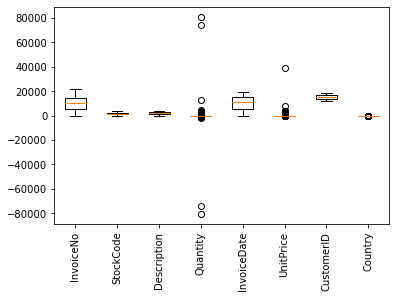

In [10]:
num_cols = ['InvoiceNo','StockCode','Description','Quantity','InvoiceDate','UnitPrice','CustomerID','Country']
fig, ax= plt.subplots()
ax.boxplot(df_train[num_cols].values)
ax.set_xticklabels(num_cols, rotation = 90)

plt.show()

#### Removing Outliers using Zscore

In [11]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df_train))
print(z)

[[6.87091350e-01 1.13953919e-02 1.72503032e+00 ... 3.81105068e-03
  7.18777452e-01 3.22699569e-01]
 [6.49624062e-01 3.24070258e-01 1.52140665e+00 ... 1.91483077e-02
  1.27759520e+00 3.22699569e-01]
 [1.22986479e+00 7.16703031e-01 7.79544691e-02 ... 3.18724887e-02
  1.42460190e-01 3.22699569e-01]
 ...
 [5.97025755e-01 1.07442275e+00 1.47552710e+00 ... 6.43982464e-02
  3.11038822e-01 3.22699569e-01]
 [6.96136068e-01 3.09765501e-03 9.77275183e-01 ... 1.55090465e-05
  2.46290628e-01 3.22699569e-01]
 [1.95731618e-01 1.22049420e+00 7.96428223e-01 ... 3.44545466e-02
  1.33974848e+00 3.22699569e-01]]


In [12]:

#calculate z-scores of df_train

abs_z_scores = np.abs(z)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_train = df_train[filtered_entries]


In [13]:
threshold = 3
print(np.where(z > 3))

(array([    20,     25,     72, ..., 284707, 284725, 284768], dtype=int64), array([7, 7, 7, ..., 7, 7, 7], dtype=int64))


In [14]:
print(z[55][1])

0.15218856463510774


In [15]:
df_train.shape

(274804, 8)

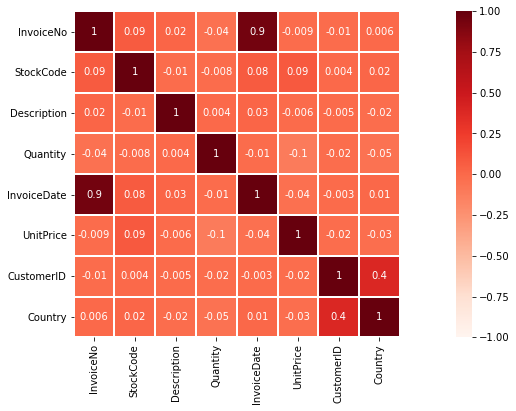

In [16]:
plt.figure(figsize = (20,6))
sns.heatmap(df_train.corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, center= 0,cmap= 'Reds',linewidths=1,linecolor='white',square=True)
            

### Data Processing on Test Data

In [17]:
df_test= pd.read_csv("D:\hackathon _Machine hack\Participants_Data_TGIH\Participants_Data_TGIH\Test.csv")

In [18]:
df_test.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country
0,3139,1709,1079,3,2011-02-22 15:22:00,16161.0,35
1,617,510,3457,1,2010-12-08 12:46:00,17341.0,35
2,14653,604,694,36,2011-10-25 13:53:00,15158.0,35
3,8634,1478,3473,2,2011-06-27 12:38:00,16033.0,35
4,15546,3216,871,1,2011-11-06 16:14:00,15351.0,35


In [19]:
df_test.shape


(122049, 7)

In [20]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122049 entries, 0 to 122048
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    122049 non-null  int64  
 1   StockCode    122049 non-null  int64  
 2   Description  122049 non-null  int64  
 3   Quantity     122049 non-null  int64  
 4   InvoiceDate  122049 non-null  object 
 5   CustomerID   122049 non-null  float64
 6   Country      122049 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 6.5+ MB


In [21]:
df_test.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
CustomerID     0
Country        0
dtype: int64

In [22]:
cat_feature = df_test.select_dtypes(include = "object").columns
print (cat_feature)

Index(['InvoiceDate'], dtype='object')


In [23]:
#Label Encoding 'for object' to numeric conversion
from sklearn.preprocessing import LabelEncoder
LE_var = LabelEncoder()

for col in cat_feature:
    df_test[col] = LE_var.fit_transform(df_test[col].astype(str))

print (df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122049 entries, 0 to 122048
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    122049 non-null  int64  
 1   StockCode    122049 non-null  int64  
 2   Description  122049 non-null  int64  
 3   Quantity     122049 non-null  int64  
 4   InvoiceDate  122049 non-null  int32  
 5   CustomerID   122049 non-null  float64
 6   Country      122049 non-null  int64  
dtypes: float64(1), int32(1), int64(5)
memory usage: 6.1 MB
None


In [24]:
df_test.shape

(122049, 7)

### Splitting the dataset into train and test data

In [25]:
X=df_train.drop(['UnitPrice'],1)


In [26]:
y=df_train['UnitPrice'].copy()

In [27]:
X.shape

(274804, 7)

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50)

### Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
LR=LinearRegression()
LR.fit(X_train,y_train)
LR_pred=LR.predict(X_test)
print('Test RMSE:',np.sqrt(mean_squared_error(y_test,LR_pred)))

Test RMSE: 4.417478534168897


In [30]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 500, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print('Test RMSE:',np.sqrt(mean_squared_error(y_test,rf_pred)))


Test RMSE: 1.7166940927039251


In [31]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(n_estimators=100)
ada.fit(X_train, y_train)
predictions = ada.predict(X_test)
print('Test RMSE:',np.sqrt(mean_squared_error(y_test,predictions)))


Test RMSE: 5.273155625868379


In [32]:
import xgboost as xgb
model=xgb.XGBRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print('Test RMSE:',np.sqrt(mean_squared_error(y_test,predictions)))

Test RMSE: 2.0379306742310668


In [33]:
y_pred_test = rf.predict(df_test)

In [34]:
y_pred_rf=pd.DataFrame(y_pred_test, columns=['UnitPrice']) 

In [35]:
df_test_final = pd.concat([y_pred_rf],1)

df_test_final

,UnitPrice
0,1.65000
1,1.25000
2,3.50842
3,1.65000
4,12.75000
...,...
122044,0.58434
122045,1.69000
122046,1.29340
122047,3.94098


In [36]:
df_test_final.set_index('UnitPrice', inplace=True)

In [37]:
df_test_final.to_csv('D:/hackathon _Machine hack/submission_2.csv', index=True)

In [38]:
# xgboost
y_pred_test1 = model.predict(df_test)

In [39]:
y_pred_xgb=pd.DataFrame(y_pred_test1, columns=['UnitPrice']) 

In [40]:
df_test_final_xg = pd.concat([y_pred_xgb],1)

df_test_final_xg

,UnitPrice
0,2.444913
1,1.986671
2,2.397069
3,2.064296
4,11.581349
...,...
122044,1.101900
122045,1.546665
122046,1.665940
122047,6.695919


In [41]:
df_test_final_xg.set_index('UnitPrice', inplace=True)

In [42]:
df_test_final_xg.to_csv('D:/hackathon _Machine hack/submission_3.csv', index=True)